# Create Dataframe for K-Means

In [13]:
data_dic = {"f1": [1.0, 1.5, 3.0, 5.0, 3.5, 4.5, 3.5],
            "target": [1.0, 2.0, 4.0, 7.0, 5.0, 5.0, 4.5]}

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.DataFrame(data_dic, index=range(1, len(data_dic['f1']) + 1))
df

,f1,target
1,1.0,1.0
2,1.5,2.0
3,3.0,4.0
4,5.0,7.0
5,3.5,5.0
6,4.5,5.0
7,3.5,4.5


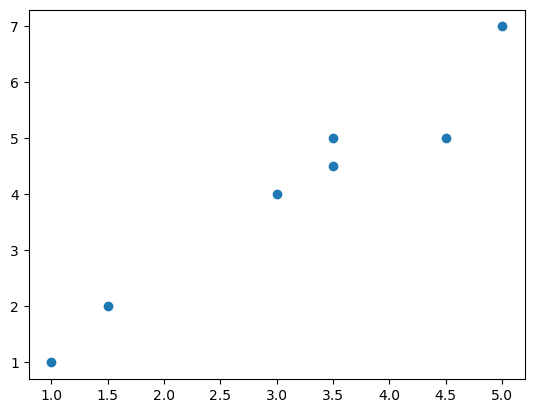

In [17]:
plt.scatter(df['f1'], df['target'])

## Initial Clusters
#### Now we set K = 2 (Number of Clusters)

In [564]:
def initialize_centroids(data, k):
    one_dimensional_arr = data.shape[0] # getting rows count
    get_random_index = np.random.choice(one_dimensional_arr, size=k, replace=False) # now here necessary that we pass only one column for choosing index
    centroids = data[get_random_index]
    return centroids

def calculate_distance_and_make_clusters(data, centroids):
    clusters = []
    for point in data:
        distance = [np.linalg.norm(point-centroid) for centroid in centroids]
        min_centroid = np.argmin(distance)
        clusters.append(min_centroid)
        
    return np.array(clusters)
    
def update_centroid(data, clusters, k):
    for i in range(k):
        print(i)
        d = data[clusters==i]
        mean_of_new_cluster = np.mean(d, axis=0)
        print(d)
        print('mean', mean_of_new_cluster)
        return mean_of_new_cluster
        

def K_means(data, k):
    centroids= initialize_centroids(data, k)
    for _ in range(len(data)):
        clusters = calculate_distance_and_make_clusters(data, centroids)
        new_centroid = update_centroid(data, clusters, k)
        
    
    # Now find the distance between each and every point
    distances = calculate_distance(data, centroids)

In [562]:
## Convert pandas dataFrame into numpy array
data = df.to_numpy()

In [580]:
centroids = initialize_centroids(data, k=3)
clusters = calculate_distance_and_make_clusters(data, centroids)
update = update_centroid(data, clusters, k=3)

0
[[1.5 2. ]]
mean [1.5 2. ]


In [581]:
clusters

array([2, 0, 1, 1, 1, 1, 1], dtype=int64)

In [582]:
K_means(data , 2)

0
[[1.  1. ]
 [1.5 2. ]]
mean [1.25 1.5 ]
0
[[1.  1. ]
 [1.5 2. ]]
mean [1.25 1.5 ]
0
[[1.  1. ]
 [1.5 2. ]]
mean [1.25 1.5 ]
0
[[1.  1. ]
 [1.5 2. ]]
mean [1.25 1.5 ]
0
[[1.  1. ]
 [1.5 2. ]]
mean [1.25 1.5 ]
0
[[1.  1. ]
 [1.5 2. ]]
mean [1.25 1.5 ]
0
[[1.  1. ]
 [1.5 2. ]]
mean [1.25 1.5 ]
0
0
1
1
1
1
1


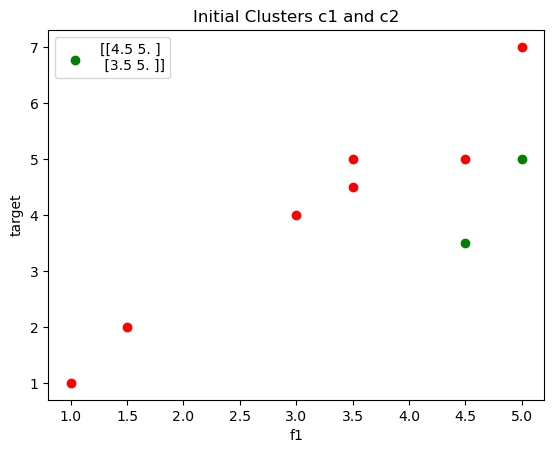

In [491]:
## below colors i important for demonstration of clusters
# colors = ['r' if [df.iloc[i][0], df.iloc[i][1]] == list(c1) else 'g' for i in range(len(df))]
plt.scatter(df['f1'], df['target'], color='red')
plt.scatter(list(centroids)[0], list(centroids)[1], label=centroids,  color="green")

plt.xlabel("f1")
plt.ylabel("target")
plt.title("Initial Clusters c1 and c2")
plt.legend()
plt.show()

In [78]:
### Demonstration of Euclidian distance.
### Subtract each point of df from c1 and c2. Here you can show process of c1 only. Next, we make function of it.
np.sqrt((c1[0] - df.iloc[1][0])**2 + (c1[1] - df.iloc[1][1])**2)


1.118033988749895

In [479]:
def distance(c1, df):
    distance_from_cluster_1 = []
    distance_from_cluster_2 = []
    
    # make a 2 clusters
    cluster_1 = []
    cluster_2 = []
    for i in range(len(df)):
            # calculate c1 distance
            distance_1 = np.sqrt((c1[0] - df.iloc[i][0])**2 + (c1[1] - df.iloc[i][1])**2)
            distance_from_cluster_1.append(distance_1)
            
            # calculate c2 distance
            distance_2 = np.sqrt((c2[0] - df.iloc[i][0])**2 + (c2[1] - df.iloc[i][1])**2)
            distance_from_cluster_2.append(distance_2)
            
            if distance_1<=distance_2:
                cluster_1.append(tuple(df.iloc[i]))
                cluster_1 = pd.DataFrame(cluster_1, columns=['f1','f2'])
            else:
                cluster_2.append(tuple(df.iloc[i]))
                cluster_2 = pd.DataFrame(cluster_2, columns=['f1','f2'])
    print("CLUSTER 1: ", cluster_1)
    print("CLUSTER 2: ", cluster_2)
#     print("Mean of cluster 1: ", np.mean(cluster_1))
#     print("Mean of cluster 2: ", np.mean(cluster_2))
                                       
#     return cluster_1, cluster_2

In [480]:
cluster_1, cluster_2 = distance(c1, df)

pd.DataFrame(cluster_1, columns=['f1','f2'])

C:\Users\rcc\AppData\Local\Temp\ipykernel_10472\94641910.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_1.append(tuple(df.iloc[i]))


TypeError: cannot concatenate object of type '<class 'float'>'; only Series and DataFrame objs are valid

In [473]:
# distance_from_cluster_1, distance_from_cluster_2 = distance(c1, df)

In [443]:
distance_from_cluster_1

[0.0,
 1.118033988749895,
 3.605551275463989,
 7.211102550927978,
 4.716990566028302,
 5.315072906367325,
 4.301162633521313]

In [346]:
distance_from_cluster_2

[7.211102550927978,
 6.103277807866851,
 3.605551275463989,
 0.0,
 2.5,
 2.0615528128088303,
 2.9154759474226504]

In [404]:
for count, (d1, d2) in enumerate(zip(distance_from_cluster_1, distance_from_cluster_2)):
    cluster_1 = []
    cluster_2 = []
    if d1<=d2:
        print(df)
        cluster_1.append()
        print("cluster 1: ", d1)
    else:
        print("cluster 2: ", d2)

    print(count+1, d1)

    f1   f2
1  1.0  1.0
2  1.5  2.0
3  3.0  4.0
4  5.0  7.0
5  3.5  5.0
6  4.5  5.0
7  3.5  4.5


TypeError: list.append() takes exactly one argument (0 given)

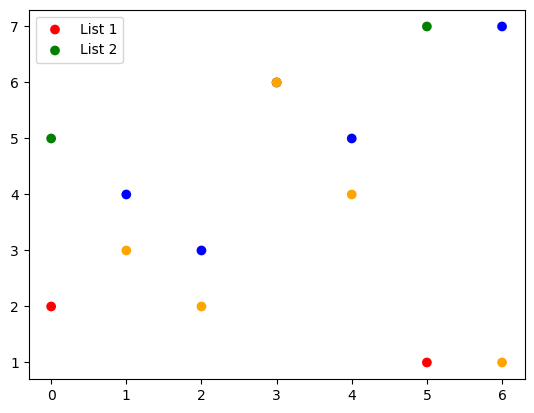

In [335]:
import matplotlib.pyplot as plt

# Define the two lists with 7 elements each
list1 = [2, 4, 3, 6, 5, 1, 7]
list2 = [5, 3, 2, 6, 4, 7, 1]

# Define colors based on the comparison of elements
colors1 = ['red' if x < y else 'blue' for x, y in zip(list1, list2)]
colors2 = ['green' if x < y else 'orange' for x, y in zip(list1, list2)]

# Plot the elements of list1
plt.scatter(range(len(list1)), list1, c=colors1, label='List 1')

# Plot the elements of list2
plt.scatter(range(len(list2)), list2, c=colors2, label='List 2')

# Add legend
plt.legend()

# Show the plot
plt.show()
